### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import distance_metrics

In [2]:
years = ['22','21','20','19','18']
stats = ['wages','standard','shooting','passing','gsc','defend','poss','misc']

In [3]:
wages_tags = []
wages_df = {}
for year in years:
    wages_tags.append(year+stats[0])
for tag in wages_tags:
    wages_df[tag] = pd.DataFrame()

In [4]:
for i in range(len(wages_df)):
    wages_df[i] = pd.read_csv(f'{wages_tags[i]}.csv',encoding='ISO-8859-1')
    wages_df[i] = wages_df[i].rename(columns={"Player-additional": "PlayerID"})
    wages_df[i] = wages_df[i][['Player','Age','Pos','Annual Wages','PlayerID']]
    wages_df[i]['Annual Wages'] = wages_df[i]['Annual Wages'].str.split('$').str[1]
    wages_df[i]['Annual Wages'] = wages_df[i]['Annual Wages'].str.replace(')','').astype(int)
    wages_df[i]['Pos1'] = wages_df[i]['Pos'].str.slice(stop=2)
    wages_df[i]['Pos2'] = wages_df[i]['Pos'].str.slice(start=2)
    wages_df[i]['Player'] = wages_df[i]['Player'] + f' {years[i]}'
    wages_df[i]['PlayerID'] = wages_df[i]['PlayerID'] + f'-{years[i]}'

C:\Users\exf39\AppData\Local\Temp/ipykernel_10276/1199662294.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  wages_df[i]['Annual Wages'] = wages_df[i]['Annual Wages'].str.replace(')','').astype(int)


In [5]:
wages_df_train = pd.concat([wages_df[1],wages_df[2],wages_df[3],wages_df[4]])
wages_df_new = wages_df[0]
wages_df_train

,Player,Age,Pos,Annual Wages,PlayerID,Pos1,Pos2
0,Gareth Bale 21,31,FW,37914901,a58bb1e1-21,FW,
1,Kevin De Bruyne 21,29,MFFW,25276601,e46012d4-21,MF,FW
2,David de Gea 21,29,GK,23696813,7ba6d84e-21,GK,
3,Mesut Özil 21,32,NaN,22117026,16380240-21,NaN,NaN
4,Raheem Sterling 21,25,FW,18957451,b400bde0-21,FW,
...,...,...,...,...,...,...,...
558,Fraser Hornby 18,17,FW,6076,29aee77c-18,FW,
559,Michael Collins 18,16,NaN,6076,f2c6376e-18,NaN,NaN
560,Morgan Feeney 18,18,DF,6076,7abbf224-18,DF,
561,Shayne Lavery 18,18,NaN,6076,d333ffb9-18,NaN,NaN


In [6]:
shooting_tags = []
shooting_df = {}
for year in years:
    shooting_tags.append(year+stats[2])
for tag in shooting_tags:
    shooting_df[tag] = pd.DataFrame()

In [7]:
for i in range(len(shooting_df)):
    shooting_df[i] = pd.read_csv(f'{shooting_tags[i]}.csv',encoding='ISO-8859-1')
    shooting_df[i] = shooting_df[i].iloc[:,[8,9,24]]
    new_header = shooting_df[i].iloc[0]
    shooting_df[i] = shooting_df[i][1:]
    shooting_df[i].columns = new_header
    shooting_df[i] = shooting_df[i].rename(columns={"-9999": "PlayerID"})
    shooting_df[i]['PlayerID'] = shooting_df[i]['PlayerID'] + f'-{years[i]}'
    shooting_df[i][['Sh','SoT']] = shooting_df[i][['Sh','SoT']].astype(float)
    shooting_df[i]['SoT'] = shooting_df[i]['SoT'] / 90
    shooting_df[i] = shooting_df[i].groupby(by=['PlayerID']).sum()

In [8]:
shooting_df_train = pd.concat([shooting_df[1],shooting_df[2],shooting_df[3],shooting_df[4]])
shooting_df_new = shooting_df[0]
shooting_df_train

,Sh,SoT
PlayerID,,
00f0482f-21,0.0,0.000000
012c975a-21,7.0,0.000000
02b29014-21,18.0,0.055556
0313a347-21,22.0,0.077778
03edb878-21,4.0,0.022222
...,...,...
fdd85f94-18,36.0,0.055556
fe012aca-18,0.0,0.000000
ff527768-18,13.0,0.044444


In [9]:
passing_tags = []
passing_df = {}
for year in years:
    passing_tags.append(year+stats[3])
for tag in passing_tags:
    passing_df[tag] = pd.DataFrame()

In [10]:
for i in range(len(passing_df)):
    passing_df[i] = pd.read_csv(f'{passing_tags[i]}.csv',encoding='ISO-8859-1')
    passing_df[i] = passing_df[i].iloc[:,[7,8,28,30]]
    new_header = passing_df[i].iloc[0]
    passing_df[i] = passing_df[i][1:]
    passing_df[i].columns = new_header
    passing_df[i] = passing_df[i].rename(columns={"-9999": "PlayerID"})
    passing_df[i]['PlayerID'] = passing_df[i]['PlayerID'] + f'-{years[i]}'
    passing_df[i][['Cmp','Att','CrsPA']] = passing_df[i][['Cmp','Att','CrsPA']].astype(float)
    passing_df[i] = passing_df[i].groupby(by=['PlayerID']).sum()

In [11]:
passing_df_train = pd.concat([passing_df[1],passing_df[2],passing_df[3],passing_df[4]])
passing_df_new = passing_df[0]
passing_df_train

,Cmp,Att,CrsPA
PlayerID,,,
00f0482f-21,5.0,6.0,0.0
012c975a-21,440.0,504.0,0.0
02b29014-21,1141.0,1354.0,1.0
0313a347-21,1102.0,1305.0,0.0
03edb878-21,24.0,36.0,0.0
...,...,...,...
fdd85f94-18,1088.0,1405.0,3.0
fe012aca-18,4.0,4.0,0.0
ff527768-18,1127.0,1367.0,4.0


In [12]:
gsc_tags = []
gsc_df = {}
for year in years:
    gsc_tags.append(year+stats[4])
for tag in gsc_tags:
    gsc_df[tag] = pd.DataFrame()

In [13]:
for i in range(len(gsc_df)):
    gsc_df[i] = pd.read_csv(f'{gsc_tags[i]}.csv',encoding='ISO-8859-1')
    gsc_df[i] = gsc_df[i].iloc[:,[11,12,15,23]]
    new_header = gsc_df[i].iloc[0]
    gsc_df[i] = gsc_df[i][1:]
    gsc_df[i].columns = new_header
    gsc_df[i] = gsc_df[i].rename(columns={"-9999": "PlayerID"})
    gsc_df[i]['PlayerID'] = gsc_df[i]['PlayerID'] + f'-{years[i]}'
    gsc_df[i][['TO','Sh','GCA']] = gsc_df[i][['TO','Sh','GCA']].astype(float)
    gsc_df[i] = gsc_df[i].groupby(by=['PlayerID']).sum()

In [14]:
gsc_df_train = pd.concat([gsc_df[1],gsc_df[2],gsc_df[3],gsc_df[4]])
gsc_df_new = gsc_df[0]
gsc_df_train

,TO,Sh,GCA
PlayerID,,,
00f0482f-21,0.0,0.0,0.0
012c975a-21,0.0,1.0,1.0
02b29014-21,2.0,2.0,7.0
0313a347-21,0.0,1.0,0.0
03edb878-21,0.0,1.0,0.0
...,...,...,...
fdd85f94-18,6.0,5.0,7.0
fe012aca-18,0.0,0.0,0.0
ff527768-18,0.0,1.0,1.0


In [15]:
defend_tags = []
defend_df = {}
for year in years:
    defend_tags.append(year+stats[5])
for tag in defend_tags:
    defend_df[tag] = pd.DataFrame()

In [16]:
for i in range(len(defend_df)):
    defend_df[i] = pd.read_csv(f'{defend_tags[i]}.csv',encoding='ISO-8859-1')
    defend_df[i] = defend_df[i].iloc[:,[8,17,22,23]]
    new_header = defend_df[i].iloc[0]
    defend_df[i] = defend_df[i][1:]
    defend_df[i].columns = new_header
    defend_df[i] = defend_df[i].rename(columns={"-9999": "PlayerID"})
    defend_df[i]['PlayerID'] = defend_df[i]['PlayerID'] + f'-{years[i]}'
    defend_df[i][['TklW','Sh','Err']] = defend_df[i][['TklW','Sh','Err']].astype(float)
    defend_df[i] = defend_df[i].groupby(by=['PlayerID']).sum()

In [17]:
defend_df_train = pd.concat([defend_df[1],defend_df[2],defend_df[3],defend_df[4]])
defend_df_new = defend_df[0]
defend_df_train

,TklW,Sh,Err
PlayerID,,,
00f0482f-21,0.0,0.0,0.0
012c975a-21,4.0,3.0,1.0
02b29014-21,32.0,7.0,1.0
0313a347-21,13.0,47.0,1.0
03edb878-21,2.0,1.0,0.0
...,...,...,...
fdd85f94-18,44.0,11.0,2.0
fe012aca-18,0.0,0.0,0.0
ff527768-18,36.0,10.0,1.0


In [18]:
poss_tags = []
poss_df = {}
for year in years:
    poss_tags.append(year+stats[6])
for tag in poss_tags:
    poss_df[tag] = pd.DataFrame()

In [19]:
for i in range(len(poss_df)):
    poss_df[i] = pd.read_csv(f'{poss_tags[i]}.csv',encoding='ISO-8859-1')
    poss_df[i] = poss_df[i].iloc[:,[9,10,20,29]]
    new_header = poss_df[i].iloc[0]
    poss_df[i] = poss_df[i][1:]
    poss_df[i].columns = new_header
    poss_df[i] = poss_df[i].rename(columns={"-9999": "PlayerID"})
    poss_df[i]['PlayerID'] = poss_df[i]['PlayerID'] + f'-{years[i]}'
    poss_df[i][['Def 3rd','Mid 3rd','TotDist']] = poss_df[i][['Def 3rd','Mid 3rd','TotDist']].astype(float)
    poss_df[i] = poss_df[i].groupby(by=['PlayerID']).sum()

In [20]:
poss_df_train = pd.concat([poss_df[1],poss_df[2],poss_df[3],poss_df[4]])
poss_df_new = poss_df[0]
poss_df_train

,Def 3rd,Mid 3rd,TotDist
PlayerID,,,
00f0482f-21,1.0,6.0,26.0
012c975a-21,264.0,279.0,1311.0
02b29014-21,423.0,881.0,4317.0
0313a347-21,961.0,631.0,2982.0
03edb878-21,8.0,31.0,137.0
...,...,...,...
fdd85f94-18,414.0,1154.0,4348.0
fe012aca-18,0.0,2.0,7.0
ff527768-18,334.0,1059.0,4107.0


In [21]:
misc_tags = []
misc_df = {}
for year in years:
    misc_tags.append(year+stats[7])
for tag in misc_tags:
    misc_df[tag] = pd.DataFrame()

In [22]:
for i in range(len(misc_df)):
    misc_df[i] = pd.read_csv(f'{misc_tags[i]}.csv',encoding='ISO-8859-1')
    misc_df[i] = misc_df[i].iloc[:,[14,19,20,23]]
    new_header = misc_df[i].iloc[0]
    misc_df[i] = misc_df[i][1:]
    misc_df[i].columns = new_header
    misc_df[i] = misc_df[i].rename(columns={"-9999": "PlayerID"})
    misc_df[i]['PlayerID'] = misc_df[i]['PlayerID'] + f'-{years[i]}'
    misc_df[i][['Int','Recov','Won']] = misc_df[i][['Int','Recov','Won']].astype(float)
    misc_df[i] = misc_df[i].groupby(by=['PlayerID']).sum()

In [23]:
misc_df_train = pd.concat([misc_df[1],misc_df[2],misc_df[3],misc_df[4]])
misc_df_new = misc_df[0]
misc_df_train

,Int,Recov,Won
PlayerID,,,
00f0482f-21,0.0,1.0,1.0
012c975a-21,6.0,34.0,30.0
02b29014-21,39.0,186.0,38.0
0313a347-21,29.0,156.0,93.0
03edb878-21,1.0,15.0,5.0
...,...,...,...
fdd85f94-18,60.0,245.0,46.0
fe012aca-18,0.0,0.0,0.0
ff527768-18,47.0,222.0,10.0


In [24]:
merged_df_train = wages_df_train.drop(columns=['Pos','Pos2'])
merged_df_train = merged_df_train.merge(shooting_df_train, on='PlayerID')
merged_df_train = merged_df_train.merge(passing_df_train, on='PlayerID')
merged_df_train = merged_df_train.merge(gsc_df_train, on='PlayerID')
merged_df_train = merged_df_train.merge(defend_df_train, on='PlayerID')
merged_df_train = merged_df_train.merge(poss_df_train, on='PlayerID')
merged_df_train = merged_df_train.merge(misc_df_train, on='PlayerID')

merged_df_train

,Player,Age,Annual Wages,PlayerID,Pos1,Sh_x,SoT,Cmp,Att,CrsPA,...,GCA,TklW,Sh,Err,Def 3rd,Mid 3rd,TotDist,Int,Recov,Won
0,Gareth Bale 21,31,37914901,a58bb1e1-21,FW,38.0,0.211111,285.0,416.0,3.0,...,6.0,10.0,2.0,0.0,79.0,251.0,2345.0,8.0,38.0,23.0
1,Kevin De Bruyne 21,29,25276601,e46012d4-21,MF,77.0,0.266667,1078.0,1429.0,10.0,...,18.0,21.0,1.0,0.0,105.0,715.0,5855.0,9.0,116.0,4.0
2,David de Gea 21,29,23696813,7ba6d84e-21,GK,0.0,0.000000,464.0,592.0,0.0,...,1.0,0.0,0.0,3.0,638.0,1.0,1437.0,0.0,32.0,4.0
3,Raheem Sterling 21,25,18957451,b400bde0-21,FW,69.0,0.311111,966.0,1141.0,1.0,...,15.0,10.0,0.0,0.0,65.0,568.0,6339.0,15.0,99.0,9.0
4,Paul Pogba 21,27,18325536,867239d3-21,MF,31.0,0.122222,1112.0,1367.0,1.0,...,7.0,26.0,2.0,0.0,324.0,885.0,4978.0,26.0,148.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,Levi Lumeka 18,18,31596,199ff86e-18,FW,1.0,0.000000,5.0,11.0,0.0,...,0.0,1.0,0.0,0.0,2.0,7.0,87.0,1.0,2.0,0.0
1923,Tyrese Campbell 18,17,6076,38aefb74-18,FW,2.0,0.011111,10.0,20.0,0.0,...,0.0,1.0,1.0,0.0,2.0,9.0,41.0,1.0,1.0,2.0
1924,Michael Obafemi 18,17,6076,caa1a7f0-18,FW,1.0,0.000000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1925,Callum Hudson-Odoi 18,16,6076,15f3ec41-18,NaN,2.0,0.011111,12.0,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,199.0,0.0,0.0,0.0


In [25]:
merged_df_new = wages_df_new.drop(columns=['Pos','Pos2'])
merged_df_new = merged_df_new.merge(shooting_df_new, on='PlayerID')
merged_df_new = merged_df_new.merge(passing_df_new, on='PlayerID')
merged_df_new = merged_df_new.merge(gsc_df_new, on='PlayerID')
merged_df_new = merged_df_new.merge(defend_df_new, on='PlayerID')
merged_df_new = merged_df_new.merge(poss_df_new, on='PlayerID')
merged_df_new = merged_df_new.merge(misc_df_new, on='PlayerID')

merged_df_new

,Player,Age,Annual Wages,PlayerID,Pos1,Sh_x,SoT,Cmp,Att,CrsPA,...,GCA,TklW,Sh,Err,Def 3rd,Mid 3rd,TotDist,Int,Recov,Won
0,Cristiano Ronaldo 22,36,32567928,dea698d9-22,FW,107.0,0.433333,726.0,904.0,0.0,...,9.0,6.0,0.0,0.0,102.0,500.0,3252.0,2.0,52.0,42.0
1,Kevin De Bruyne 22,30,25276601,e46012d4-22,MF,78.0,0.344444,1170.0,1568.0,10.0,...,14.0,16.0,2.0,0.0,127.0,685.0,5397.0,6.0,114.0,11.0
2,David de Gea 22,30,23696813,7ba6d84e-22,GK,0.0,0.000000,677.0,924.0,0.0,...,0.0,0.0,0.0,2.0,1019.0,1.0,2450.0,0.0,30.0,8.0
3,Jadon Sancho 22,21,22117026,dbf053da-22,FW,26.0,0.100000,805.0,984.0,7.0,...,9.0,8.0,0.0,3.0,146.0,451.0,5515.0,15.0,112.0,2.0
4,Raphaël Varane 22,28,21485111,9f8e9423-22,DF,9.0,0.011111,1014.0,1156.0,0.0,...,2.0,19.0,9.0,1.0,645.0,659.0,4704.0,18.0,78.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,Jamie Shackleton 22,21,97218,8d03ca5a-22,DF,4.0,0.011111,353.0,409.0,0.0,...,1.0,16.0,7.0,1.0,190.0,225.0,1329.0,8.0,50.0,5.0
492,Carney Chukwuemeka 22,17,97218,b2f9c73e-22,MF,4.0,0.011111,98.0,121.0,0.0,...,2.0,1.0,0.0,1.0,22.0,89.0,710.0,1.0,16.0,7.0
493,Sam Greenwood 22,19,85065,f3354c07-22,MF,4.0,0.000000,54.0,80.0,0.0,...,1.0,5.0,0.0,0.0,14.0,61.0,252.0,2.0,14.0,2.0
494,Sean Longstaff 22,23,60761,a2b105e0-22,MF,15.0,0.022222,481.0,604.0,0.0,...,3.0,34.0,6.0,0.0,201.0,439.0,1366.0,9.0,95.0,13.0


In [26]:
merged_df = merged_df_train.append(merged_df_new)
merged_df

,Player,Age,Annual Wages,PlayerID,Pos1,Sh_x,SoT,Cmp,Att,CrsPA,...,GCA,TklW,Sh,Err,Def 3rd,Mid 3rd,TotDist,Int,Recov,Won
0,Gareth Bale 21,31,37914901,a58bb1e1-21,FW,38.0,0.211111,285.0,416.0,3.0,...,6.0,10.0,2.0,0.0,79.0,251.0,2345.0,8.0,38.0,23.0
1,Kevin De Bruyne 21,29,25276601,e46012d4-21,MF,77.0,0.266667,1078.0,1429.0,10.0,...,18.0,21.0,1.0,0.0,105.0,715.0,5855.0,9.0,116.0,4.0
2,David de Gea 21,29,23696813,7ba6d84e-21,GK,0.0,0.000000,464.0,592.0,0.0,...,1.0,0.0,0.0,3.0,638.0,1.0,1437.0,0.0,32.0,4.0
3,Raheem Sterling 21,25,18957451,b400bde0-21,FW,69.0,0.311111,966.0,1141.0,1.0,...,15.0,10.0,0.0,0.0,65.0,568.0,6339.0,15.0,99.0,9.0
4,Paul Pogba 21,27,18325536,867239d3-21,MF,31.0,0.122222,1112.0,1367.0,1.0,...,7.0,26.0,2.0,0.0,324.0,885.0,4978.0,26.0,148.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,Jamie Shackleton 22,21,97218,8d03ca5a-22,DF,4.0,0.011111,353.0,409.0,0.0,...,1.0,16.0,7.0,1.0,190.0,225.0,1329.0,8.0,50.0,5.0
492,Carney Chukwuemeka 22,17,97218,b2f9c73e-22,MF,4.0,0.011111,98.0,121.0,0.0,...,2.0,1.0,0.0,1.0,22.0,89.0,710.0,1.0,16.0,7.0
493,Sam Greenwood 22,19,85065,f3354c07-22,MF,4.0,0.000000,54.0,80.0,0.0,...,1.0,5.0,0.0,0.0,14.0,61.0,252.0,2.0,14.0,2.0
494,Sean Longstaff 22,23,60761,a2b105e0-22,MF,15.0,0.022222,481.0,604.0,0.0,...,3.0,34.0,6.0,0.0,201.0,439.0,1366.0,9.0,95.0,13.0


In [27]:
# Create dataframes for similarity measure
player_data_train = merged_df_train.fillna(0)
player_data_train = player_data_train.drop(columns = ['Age','Annual Wages','PlayerID','Pos1'])
player_data_train.set_index('Player', inplace=True)

player_data_new = merged_df_new.fillna(0)
player_data_new = player_data_new.drop(columns = ['Age','Annual Wages','PlayerID','Pos1'])
player_data_new.set_index('Player', inplace=True)

In [28]:
# compute the cosine similarity matrix for all pairs of players
cosine_matrix = cosine_similarity(player_data_train, player_data_new)

# for each player, get the indices of the two most similar players
most_similar_cosine = []
for i in range(len(player_data_train)):
    # sort the cosine similarity values for player i in descending order
    sorted_indices_cosine = cosine_matrix[i].argsort()[::-1]
    # get the indices of the two most similar players (excluding player i itself)
    most_similar_indices_c = sorted_indices_cosine[:5]
    most_similar_cosine.append(most_similar_indices_c)

similar_players_c = []
# print the results
for i, similar_indices_cosine in enumerate(most_similar_cosine):
    player_name_c = player_data_train.index[i]
    similar_player_names_c = [player_data_new.index[idx] for idx in similar_indices_cosine]
    similar_players_c.append(similar_player_names_c)
    print(f"{player_name_c}'s most similar players are: {similar_player_names_c}")

Gareth Bale 21's most similar players are: ['Adam Armstrong 22', 'Bryan Mbeumo 22', 'Jarrod Bowen 22', 'Daniel Podence 22', 'Jordan Ayew 22']
Kevin De Bruyne 21's most similar players are: ['Hakim Ziyech 22', 'Phil Foden 22', 'James Maddison 22', 'Kai Havertz 22', 'Kelechi Iheanacho 22']
David de Gea 21's most similar players are: ['Edouard Mendy 22', 'Danny Ward 22', 'Jason Steele 22', 'Alisson 22', 'David de Gea 22']
Raheem Sterling 21's most similar players are: ['Luis Díaz 22', 'Anthony Martial 22', 'Son Heung-min 22', 'Jadon Sancho 22', 'Mohamed Salah 22']
Paul Pogba 21's most similar players are: ['Paul Pogba 22', 'Billy Gilmour 22', 'Lukas Rupp 22', 'Mateusz Klich 22', 'Pablo Fornals 22']
Pierre-Emerick Aubameyang 21's most similar players are: ['Kai Havertz 22', 'Emile Smith Rowe 22', 'Nathan Redmond 22', 'Solly March 22', 'Alex Oxlade-Chamberlain 22']
Anthony Martial 21's most similar players are: ['Anthony Martial 22', 'Luis Díaz 22', 'Jadon Sancho 22', 'Son Heung-min 22', 'T

In [29]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_matrix = euclidean_distances(player_data_train, player_data_new)
# for each player, get the indices of the two most similar players
most_similar_euclidean = []
for i in range(len(player_data_train)):
    # sort the euclidean distance values for player i in ascending order
    sorted_indices_euclidean = euclidean_matrix[i].argsort()
    # get the indices of the two most similar players (excluding player i itself)
    most_similar_indices_euclidean = sorted_indices_euclidean[:5]
    most_similar_euclidean.append(most_similar_indices_euclidean)

similar_players_e = []
# print the results
for i, similar_indices_euclidean in enumerate(most_similar_euclidean):
    player_name_e = player_data_train.index[i]
    similar_player_names_e = [player_data_new.index[idx] for idx in similar_indices_euclidean]
    similar_players_e.append(similar_player_names_e)
    print(f"{player_name_e}'s most similar players are: {similar_player_names_e}")

Gareth Bale 21's most similar players are: ['Marcus Rashford 22', 'Timo Werner 22', 'Armando Broja 22', 'Odsonne Édouard 22', 'Bruno Guimarães 22']
Kevin De Bruyne 21's most similar players are: ['Kiernan Dewsbury-Hall 22', 'Leandro Trossard 22', 'Raphinha 22', 'Martin Ødegaard 22', 'Sadio Mané 22']
David de Gea 21's most similar players are: ['Alex McCarthy 22', 'Álvaro Fernández 22', 'Jamaal Lascelles 22', 'Christian Kabasele 22', 'Samir Santos 22']
Raheem Sterling 21's most similar players are: ['Son Heung-min 22', 'Bukayo Saka 22', 'Jacob Ramsey 22', 'Mohamed Salah 22', 'Sadio Mané 22']
Paul Pogba 21's most similar players are: ['Pablo Fornals 22', "N'Golo Kanté 22", 'John McGinn 22', 'Yves Bissouma 22', 'Mateo Kova?i? 22']
Pierre-Emerick Aubameyang 21's most similar players are: ['Kai Havertz 22', 'Ollie Watkins 22', 'Mohamed Elyounoussi 22', 'Philippe Coutinho 22', 'Hakim Ziyech 22']
Anthony Martial 21's most similar players are: ['Christian Pulisic 22', 'Luis Díaz 22', 'Teemu Pu

In [30]:
from sklearn.metrics.pairwise import manhattan_distances

manhattan_matrix = manhattan_distances(player_data_train, player_data_new)
# for each player, get the indices of the two most similar players
most_similar_m = []
for i in range(len(player_data_train)):
    # sort the Manhattan distance values for player i in ascending order
    sorted_indices_m = manhattan_matrix[i].argsort()
    # get the indices of the two most similar players (excluding player i itself)
    most_similar_indices_m = sorted_indices_m[:5]
    most_similar_m.append(most_similar_indices_m)

similar_players_m = []
# print the results
for i, similar_indices_m in enumerate(most_similar_m):
    player_name_m = player_data_train.index[i]
    similar_player_names_m = [player_data_new.index[idx] for idx in similar_indices_m]
    similar_players_m.append(similar_player_names_m)
    print(f"{player_name_m}'s most similar players are: {similar_player_names_m}")

Gareth Bale 21's most similar players are: ['Marcus Rashford 22', 'Timo Werner 22', 'Armando Broja 22', 'Odsonne Édouard 22', 'Callum Hudson-Odoi 22']
Kevin De Bruyne 21's most similar players are: ['Leandro Trossard 22', 'Kiernan Dewsbury-Hall 22', 'Kevin De Bruyne 22', 'Sadio Mané 22', 'Raphinha 22']
David de Gea 21's most similar players are: ['Alex McCarthy 22', 'Álvaro Fernández 22', 'Jamaal Lascelles 22', 'Willy Boly 22', 'Sam Byram 22']
Raheem Sterling 21's most similar players are: ['Son Heung-min 22', 'Bukayo Saka 22', 'Leandro Trossard 22', 'Mohamed Salah 22', 'Sadio Mané 22']
Paul Pogba 21's most similar players are: ['Pablo Fornals 22', "N'Golo Kanté 22", 'John McGinn 22', 'Yves Bissouma 22', 'Mateo Kova?i? 22']
Pierre-Emerick Aubameyang 21's most similar players are: ['Kai Havertz 22', 'Ollie Watkins 22', 'Mohamed Elyounoussi 22', 'Hakim Ziyech 22', 'Philippe Coutinho 22']
Anthony Martial 21's most similar players are: ['Christian Pulisic 22', 'Luis Díaz 22', 'Teemu Pukki 

In [31]:
player_list_train = player_data_train.index.values
player_list_new = player_data_new.index.values

In [32]:
# Create matrix for player similarity
player_similarity_matrix = pd.DataFrame(index = player_list_train, columns = player_list_new)
for i in range(len(player_list_train)):
    for j in range(len(player_list_new)):
        if player_list_new[j] in similar_players_c[i]:
            player_similarity_matrix.iloc[i,j] = 1
        else:
            player_similarity_matrix.iloc[i,j] = 0
        if player_list_new[j] in similar_players_e[i]:
            player_similarity_matrix.iloc[i,j] = player_similarity_matrix.iloc[i,j] + 1
        else:
            player_similarity_matrix.iloc[i,j] = player_similarity_matrix.iloc[i,j] + 0
        if player_list_new[j] in similar_players_m[i]:
            player_similarity_matrix.iloc[i,j] = player_similarity_matrix.iloc[i,j] + 1
        else:
            player_similarity_matrix.iloc[i,j] = player_similarity_matrix.iloc[i,j] + 0
player_similarity_matrix

,Cristiano Ronaldo 22,Kevin De Bruyne 22,David de Gea 22,Jadon Sancho 22,Raphaël Varane 22,Romelu Lukaku 22,Jack Grealish 22,Raheem Sterling 22,Paul Pogba 22,N'Golo Kanté 22,...,Jeremy Ngakia 22,Bali Mumba 22,Charlie Cresswell 22,Yan Valery 22,Jonas Lössl 22,Jamie Shackleton 22,Carney Chukwuemeka 22,Sam Greenwood 22,Sean Longstaff 22,Liam McCarron 22
Gareth Bale 21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kevin De Bruyne 21,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
David de Gea 21,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Raheem Sterling 21,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Paul Pogba 21,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Levi Lumeka 18,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Tyrese Campbell 18,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
Michael Obafemi 18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Callum Hudson-Odoi 18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
np.unique(player_similarity_matrix.values, return_counts=True)

(array([0, 1, 2, 3], dtype=object),
 array([935739,  11992,   7270,    791], dtype=int64))

In [34]:
player_table = pd.melt(player_similarity_matrix.reset_index(), id_vars='index', var_name='Player2', value_name='Similarity')
player_table = player_table[player_table.Similarity != 0]
player_table = player_table.rename(columns={"index": "Player1"})
player_table

,Player1,Player2,Similarity
19,Roberto Firmino 21,Cristiano Ronaldo 22,1
36,Kai Havertz 21,Cristiano Ronaldo 22,2
57,James Maddison 21,Cristiano Ronaldo 22,1
87,Ross Barkley 21,Cristiano Ronaldo 22,1
611,Jesse Lingard 20,Cristiano Ronaldo 22,1
...,...,...,...
955779,Eddie Nketiah 18,Liam McCarron 22,2
955780,Aiden O'Neill 18,Liam McCarron 22,2
955782,Harvey Barnes 18,Liam McCarron 22,2
955784,Rekeem Harper 18,Liam McCarron 22,2


### Collaborative Filtering with fastai

In [65]:
from fastai.basics import *
from fastai.tabular.all import *
from fastai.collab import *
from fastai.vision.all import *
from fastai.text.all import *

In [66]:
# Load data, set batch size 64, allocate 10% to validation set
dls = CollabDataLoaders.from_df(player_table, item_name='Player2', bs=64, seed=0, valid_pct=0.1)

In [67]:
x,y = dls.one_batch()
x.shape

torch.Size([64, 2])

In [68]:
dls.show_batch()

,Player1,Player2,Similarity
0,Romaine Sawyers 21,Will Hughes 22,1
1,Ben Chilwell 20,Gabriel Dos Santos 22,2
2,Danilo 18,Granit Xhaka 22,1
3,Sergio Romero 18,?ukasz Fabia?ski 22,1
4,Timothy Fosu-Mensah 19,Malang Sarr 22,2
5,Kieran Gibbs 18,Lucas Digne 22,2
6,Gary Cahill 21,Ibrahima Konaté 22,2
7,Sergio Romero 18,Danny Ward 22,2
8,Reiss Nelson 21,Harvey Barnes 22,1
9,Steven Defour 19,André Gomes 22,1


In [69]:
learn = collab_learner(dls, y_range=(0, 3.5), n_factors=50, loss_func=MSELossFlat())

SuggestedLRs(valley=0.0691830962896347)

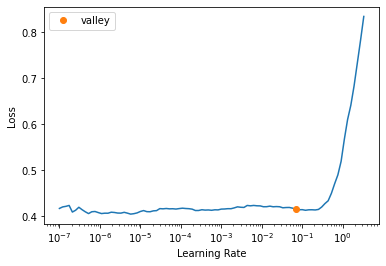

In [70]:
learn.lr_find()

In [71]:
# Run the learner through increasing epochs, with a small weight decay for regularization
learn.fit_one_cycle(3, 0.07, wd=0.1)

epoch,train_loss,valid_loss,time
0,1.320498,1.440154,00:01
1,0.730951,0.652620,00:01
2,0.302584,0.406069,00:01


In [72]:
defender = merged_df_new[merged_df_new['Pos1'] == 'DF']
midfield = merged_df_new[merged_df_new['Pos1'] == 'MF']
forward = merged_df_new[merged_df_new['Pos1'] == 'FW']

In [73]:
sort = midfield.sort_values(by = ['Annual Wages'], ascending=False)
most_expensive_players = sort['Player'].values[:100]
most_expensive_players[:15]

array(['Kevin De Bruyne 22', 'Paul Pogba 22', "N'Golo Kanté 22",
       'Bruno Fernandes 22', 'Thomas Partey 22', 'Tanguy Ndombele 22',
       'Thiago Alcántara 22', 'Saúl Ñíguez 22', 'Son Heung-min 22',
       'Fabinho 22', 'Juan Mata 22', 'Mateo Kova?i? 22',
       'Bernardo Silva 22', 'Fernandinho 22', 'James Milner 22'],
      dtype=object)

In [74]:
# Get weights
player_weight = learn.model.weight(most_expensive_players, is_item=True)
player_weight.shape

torch.Size([100, 50])

In [75]:
# PCA to reduce the dimensions
player_pca = player_weight.pca(3)
player_pca.shape

torch.Size([100, 3])

In [76]:
fac0,fac1,fac2 = player_pca.t()
player_comp0 = [(f, i) for f,i in zip(fac0, most_expensive_players)]

In [77]:
# Highest scores on first dimension
sorted(player_comp0, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.7602), 'Jack Cork 22'),
 (tensor(0.7443), 'James Milner 22'),
 (tensor(0.7166), 'Tom Cleverley 22'),
 (tensor(0.6085), 'James Maddison 22'),
 (tensor(0.5625), 'Mason Mount 22'),
 (tensor(0.4893), 'Luka Milivojevi? 22'),
 (tensor(0.4778), 'Jeffrey Schlupp 22'),
 (tensor(0.4448), 'Adam Lallana 22'),
 (tensor(0.4342), 'Jonjo Shelvey 22'),
 (tensor(0.4285), 'Josh Brownhill 22')]

In [78]:
player_comp1 = [(f, i) for f,i in zip(fac1, most_expensive_players)]

In [79]:
# Highest scores on second dimension
sorted(player_comp1, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.7986), 'Stuart Armstrong 22'),
 (tensor(0.5622), 'Jordan Henderson 22'),
 (tensor(0.5519), 'Dale Stephens 22'),
 (tensor(0.5439), 'Nélson Semedo 22'),
 (tensor(0.5416), 'Pierre Højbjerg 22'),
 (tensor(0.4654), 'James Ward-Prowse 22'),
 (tensor(0.4624), 'Nampalys Mendy 22'),
 (tensor(0.4614), 'Mason Mount 22'),
 (tensor(0.4531), 'Dan Gosling 22'),
 (tensor(0.4365), 'Mohamed Elyounoussi 22')]

In [80]:
player_comp2 = [(f, i) for f,i in zip(fac2, most_expensive_players)]

In [81]:
# Highest scores on third dimension
sorted(player_comp2, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.7509), 'Emile Smith Rowe 22'),
 (tensor(0.6751), 'Bruno Guimarães 22'),
 (tensor(0.6283), 'Leander Dendoncker 22'),
 (tensor(0.5484), 'Dan Gosling 22'),
 (tensor(0.4877), 'Robin Koch 22'),
 (tensor(0.4688), 'Oriol Romeu 22'),
 (tensor(0.4599), 'Alex Oxlade-Chamberlain 22'),
 (tensor(0.4532), 'Donny van de Beek 22'),
 (tensor(0.4495), 'Tanguy Ndombele 22'),
 (tensor(0.4358), 'Philippe Coutinho 22')]

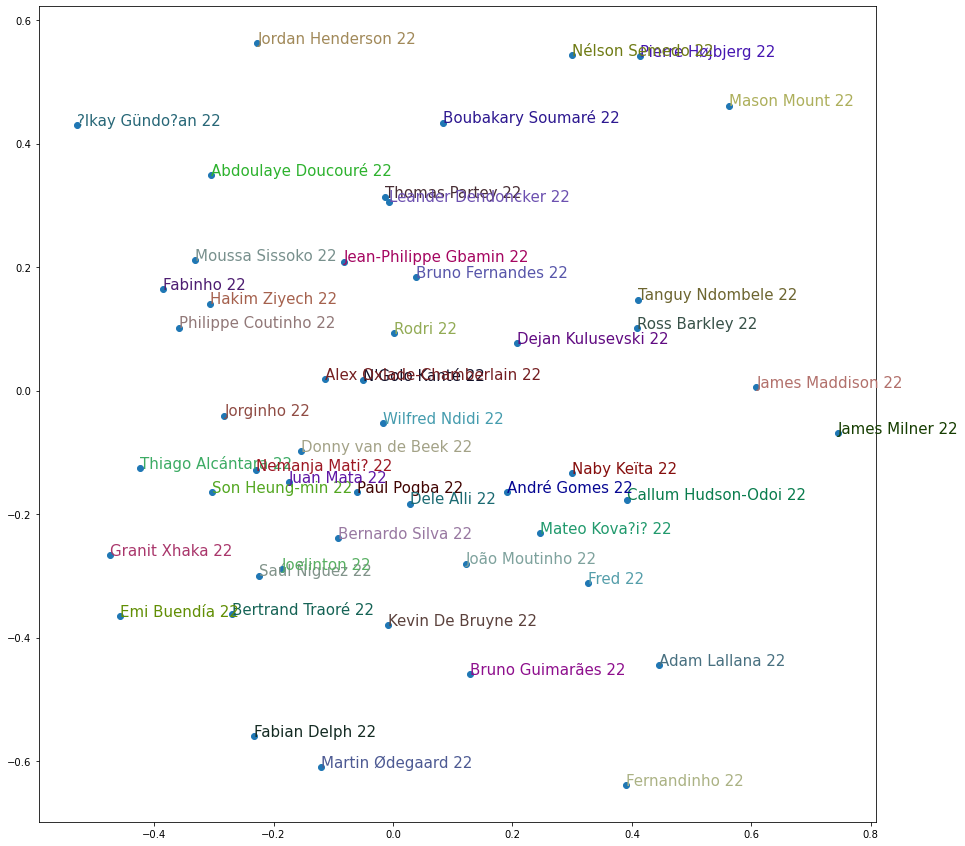

In [84]:
idxs = list(range(50))
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(most_expensive_players[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=15)
plt.show()

### LightFM

In [53]:
from lightfm import LightFM
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score

C:\ProgramData\Anaconda\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [54]:
# Round numbers to reduce columns required for CSR matrix
player_data_adjusted = player_data_train
for i in player_data_adjusted.columns:
    if max(player_data_adjusted[i]) > 100000:
        player_data_adjusted[i] = round(player_data_adjusted[i]/1000)
    if max(player_data_adjusted[i]) > 10000:
        player_data_adjusted[i] = round(player_data_adjusted[i]/100)
    if max(player_data_adjusted[i]) > 1000:
        player_data_adjusted[i] = round(player_data_adjusted[i]/10)
player_data_adjusted

,Sh_x,SoT,Cmp,Att,CrsPA,TO,Sh_y,GCA,TklW,Sh,Err,Def 3rd,Mid 3rd,TotDist,Int,Recov,Won
Player,,,,,,,,,,,,,,,,,
Gareth Bale 21,38.0,0.211111,28.0,42.0,3.0,9.0,3.0,6.0,10.0,2.0,0.0,8.0,25.0,23.0,8.0,38.0,23.0
Kevin De Bruyne 21,77.0,0.266667,108.0,143.0,10.0,10.0,5.0,18.0,21.0,1.0,0.0,10.0,72.0,59.0,9.0,116.0,4.0
David de Gea 21,0.0,0.000000,46.0,59.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,64.0,0.0,14.0,0.0,32.0,4.0
Raheem Sterling 21,69.0,0.311111,97.0,114.0,1.0,14.0,8.0,15.0,10.0,0.0,0.0,6.0,57.0,63.0,15.0,99.0,9.0
Paul Pogba 21,31.0,0.122222,111.0,137.0,1.0,2.0,5.0,7.0,26.0,2.0,0.0,32.0,88.0,50.0,26.0,148.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Levi Lumeka 18,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0
Tyrese Campbell 18,2.0,0.011111,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
Michael Obafemi 18,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
player_data_adjusted_new = player_data_new
for i in player_data_adjusted_new.columns:
    if max(player_data_adjusted_new[i]) > 100000:
        player_data_adjusted_new[i] = round(player_data_adjusted_new[i]/1000)
    if max(player_data_adjusted_new[i]) > 10000:
        player_data_adjusted_new[i] = round(player_data_adjusted_new[i]/100)
    if max(player_data_adjusted_new[i]) > 1000:
        player_data_adjusted_new[i] = round(player_data_adjusted_new[i]/10)
player_data_adjusted_new

,Sh_x,SoT,Cmp,Att,CrsPA,TO,Sh_y,GCA,TklW,Sh,Err,Def 3rd,Mid 3rd,TotDist,Int,Recov,Won
Player,,,,,,,,,,,,,,,,,
Cristiano Ronaldo 22,107.0,0.433333,73.0,90.0,0.0,9.0,6.0,9.0,6.0,0.0,0.0,10.0,50.0,33.0,2.0,52.0,42.0
Kevin De Bruyne 22,78.0,0.344444,117.0,157.0,10.0,5.0,9.0,14.0,16.0,2.0,0.0,13.0,68.0,54.0,6.0,114.0,11.0
David de Gea 22,0.0,0.000000,68.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,102.0,0.0,24.0,0.0,30.0,8.0
Jadon Sancho 22,26.0,0.100000,80.0,98.0,7.0,9.0,2.0,9.0,8.0,0.0,3.0,15.0,45.0,55.0,15.0,112.0,2.0
Raphaël Varane 22,9.0,0.011111,101.0,116.0,0.0,0.0,0.0,2.0,19.0,9.0,1.0,64.0,66.0,47.0,18.0,78.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jamie Shackleton 22,4.0,0.011111,35.0,41.0,0.0,0.0,1.0,1.0,16.0,7.0,1.0,19.0,22.0,13.0,8.0,50.0,5.0
Carney Chukwuemeka 22,4.0,0.011111,10.0,12.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0,9.0,7.0,1.0,16.0,7.0
Sam Greenwood 22,4.0,0.000000,5.0,8.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0,1.0,6.0,3.0,2.0,14.0,2.0


In [56]:
player_dict_new ={}
df = merged_df_new[['PlayerID', 'Player']].sort_values('Player').reset_index()
for i in range(df.shape[0]):
    player_dict_new[(df.loc[i,'Player'])] = df.loc[i,'Player']

In [57]:
# Create CSR matrix for player attributes
from scipy.sparse import csr_matrix
player_data_csr = csr_matrix(player_data_adjusted_new.values)
player_data_csr

<496x17 sparse matrix of type '<class 'numpy.float64'>'
	with 6778 stored elements in Compressed Sparse Row format>

In [58]:
# Create CSR matrix for player similarity interactions
player_interaction = pd.pivot_table(player_table, index='Player1', columns='Player2', values='Similarity')
player_interaction = player_interaction.fillna(0) # fill missing values with 0
player1_id = list(player_interaction.index)
player_dict = {}
counter = 0 
for i in player1_id:
    player_dict[i] = counter
    counter += 1
player_interaction_csr = csr_matrix(player_interaction.values)
player_interaction_csr

<1921x496 sparse matrix of type '<class 'numpy.float64'>'
	with 19989 stored elements in Compressed Sparse Row format>

In [59]:
# Model fitting
model_lfm = LightFM(loss='bpr',
                random_state=2016,
                learning_rate=0.90,
                no_components=150,
                user_alpha=0.000005)
model_lfm = model_lfm.fit(player_interaction_csr,
                  epochs=100,
                  num_threads=16, verbose=False)

In [60]:
# Train-test split
train_data, test_data = random_train_test_split(player_interaction_csr, 
                                                test_percentage=0.2, random_state=0)

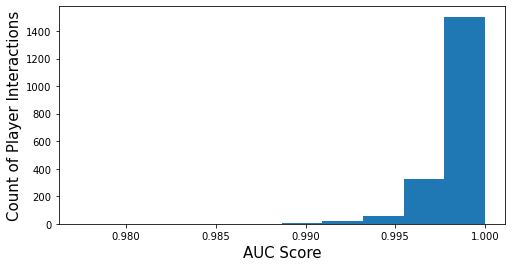

Mean AUC:  0.9985556


In [100]:
# Model evaluation
# AUC Score
auc = auc_score(model_lfm, train_data, test_data)
# Plot distribution of prediction errors
plt.figure(figsize=(8,4))
ax = plt.axes()
plt.hist(auc)
plt.xlabel('AUC Score', fontsize=15)
plt.ylabel('Count of Player Interactions', fontsize=15)
plt.show()
print("Mean AUC: ",np.mean(auc))

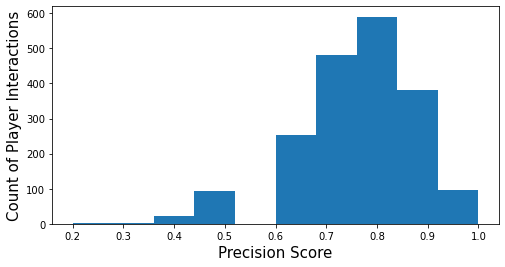

Mean Precision:  0.758355


In [101]:
# Model evaluation
# Precision @k
prec = precision_at_k(model_lfm, train_data, test_data)
# Plot distribution of prediction errors
plt.figure(figsize=(8,4))
ax = plt.axes()
plt.hist(prec)
plt.xlabel('Precision Score', fontsize=15)
plt.ylabel('Count of Player Interactions', fontsize=15)
plt.show()
print("Mean Precision: ",np.mean(prec))

In [102]:
# Sample recommendations
def sample_recommendation_user(model_lfm, interactions, player1_id, player_dict, 
                               player_dict_new,threshold = 0,nrec_items = 5, show = True):
    
    n_player1, n_player2 = interactions.shape
    player1_x = player_dict[player1_id]
    scores = pd.Series(model_lfm.predict(player1_x,np.arange(n_player2), item_features=player_data_csr))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    
    known_items = list(pd.Series(interactions.loc[player1_id,:] \
                                 [interactions.loc[player1_id,:] > threshold].index).sort_values(ascending=False))
    
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    known_items = list(pd.Series(known_items).apply(lambda x: player_dict_new[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: player_dict_new[x]))
    if show == True:
        print ("Benchmark: " + str(player1_id))
        print("Known Similar:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + i)
            counter+=1
    print("\n Recommended Items:")
    counter = 1
    for i in scores:
        print(str(counter) + '- ' + i)
        counter+=1

In [105]:
sample_recommendation_user(model_lfm, player_interaction, 'Sadio Mané 21', player_dict, player_dict_new)

Benchmark: Sadio Mané 21
Known Similar:
1- Wilfried Zaha 22
2- Steven Bergwijn 22
3- Son Heung-min 22
4- Pedro Neto 22
5- Jacob Ramsey 22
6- Jack Grealish 22
7- Harvey Barnes 22
8- Dwight McNeil 22
9- Demarai Gray 22
10- Bukayo Saka 22
11- Anwar El Ghazi 22

 Recommended Items:
1- Sean Longstaff 22
2- Carney Chukwuemeka 22
3- Cenk Tosun 22
4- Phil Foden 22
5- Leon Bailey 22
